# Explore here

In [30]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
#empezare a analizar las variables categoricas

import matplotlib.pyplot as plt
import seaborn as sns

se=df.groupby('sex').size().reset_index()
sm=df.groupby('smoker').size().reset_index()
re=df.groupby('region').size().reset_index()
print('se','sm','re')

se sm re


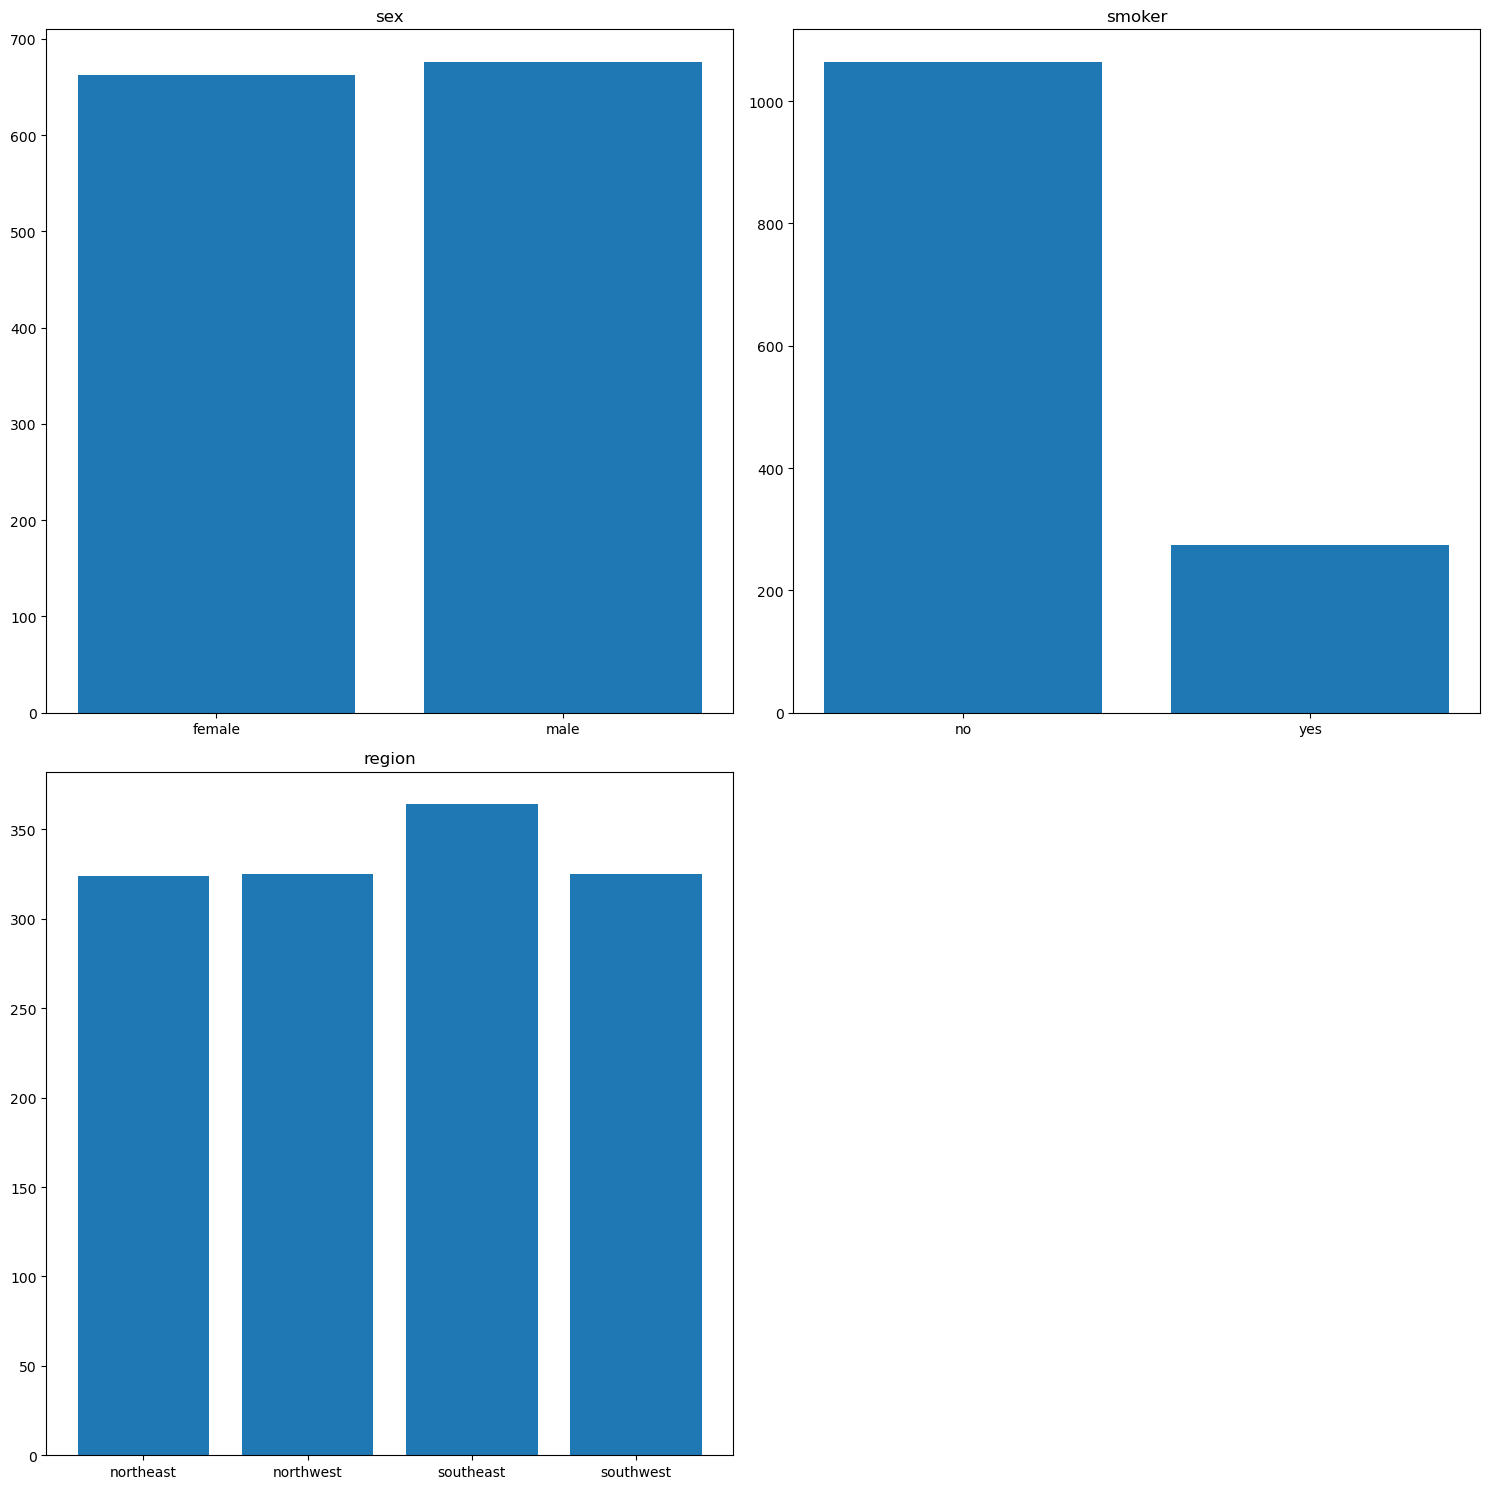

In [35]:
import matplotlib.pyplot as plt



fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axes[0, 0].bar(se.sex, se[0])
axes[0, 0].set_title("sex")

axes[0, 1].bar(sm.smoker, sm[0])
axes[0, 1].set_title("smoker")


axes[1, 0].bar(re.region, re[0])
axes[1, 0].set_title("region")

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

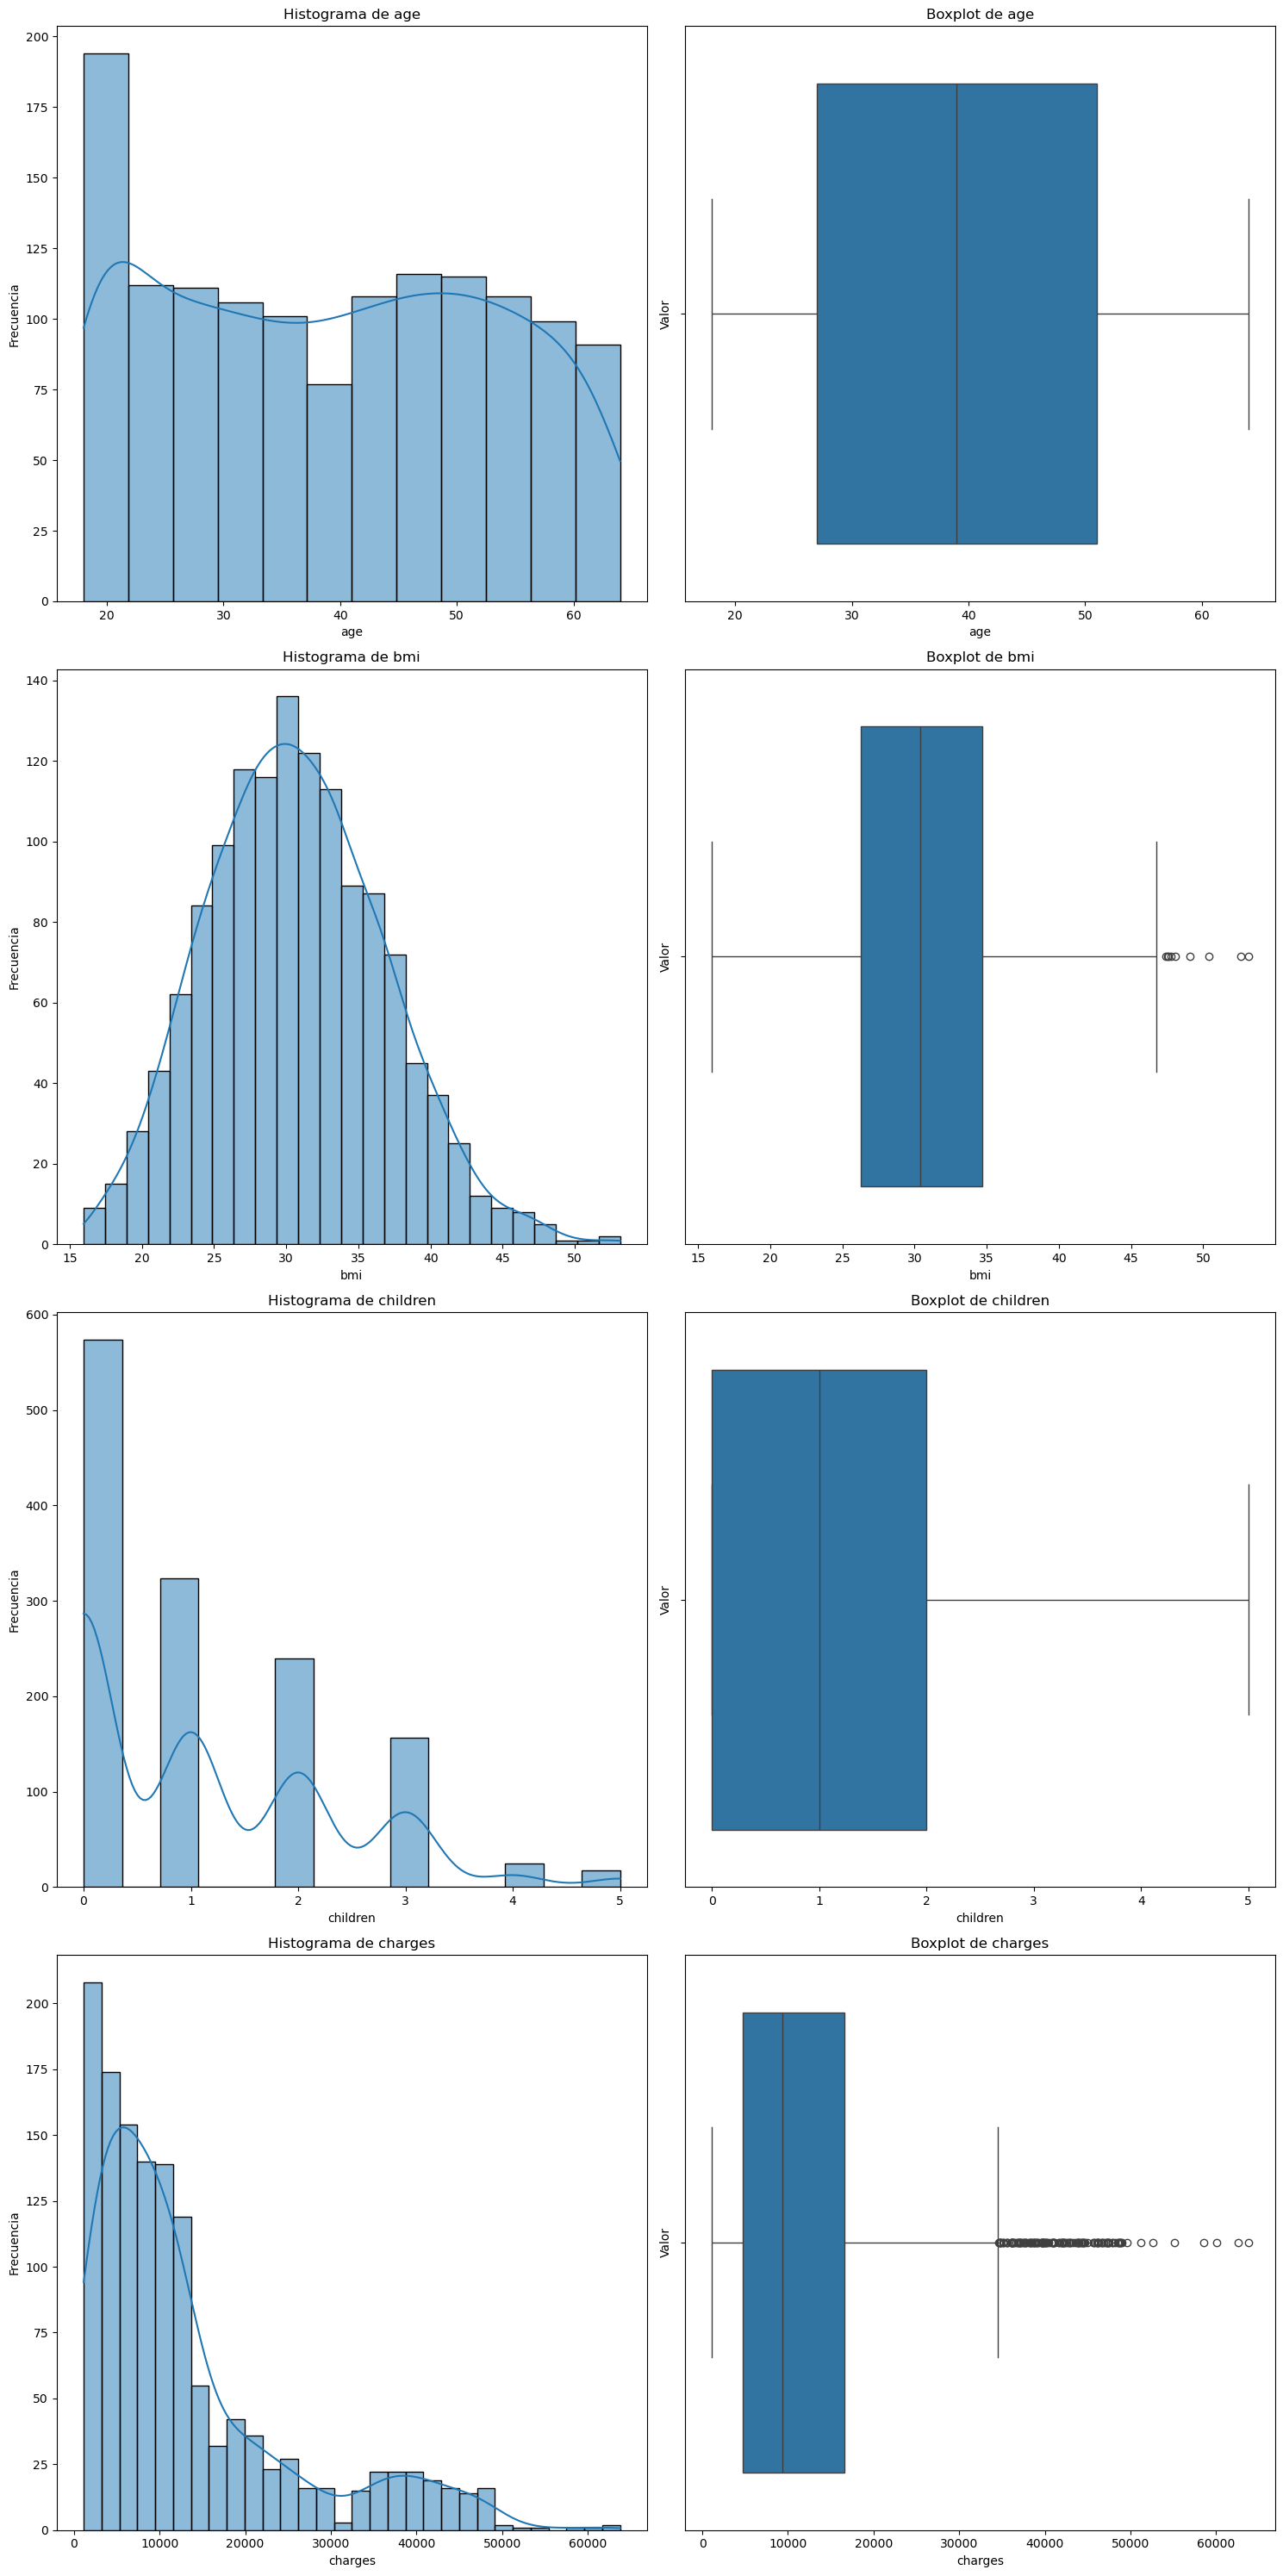

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

#Ahora analizaremos las variables numericas

fig, axes = plt.subplots(4, 2, figsize=(15, 30))  

variables_numericas = ["age", "bmi", "children", "charges"]

for i, variable in enumerate(variables_numericas):
    # Histograma
    sns.histplot(ax=axes[i, 0], data=df, x=variable, kde=True)
    axes[i, 0].set_title(f"Histograma de {variable}")
    axes[i, 0].set_xlabel(variable)
    axes[i, 0].set_ylabel("Frecuencia")

    # Boxplot
    sns.boxplot(ax=axes[i, 1], data=df, x=variable)
    axes[i, 1].set_title(f"Boxplot de {variable}")
    axes[i, 1].set_xlabel(variable)
    axes[i, 1].set_ylabel("Valor")

plt.tight_layout()
plt.show()


#el histplot lo estoy usando para enterarme de los datos recurrentes
#el boxplot lo estoy utilizando para los valores atipicos


<function matplotlib.pyplot.show(close=None, block=None)>

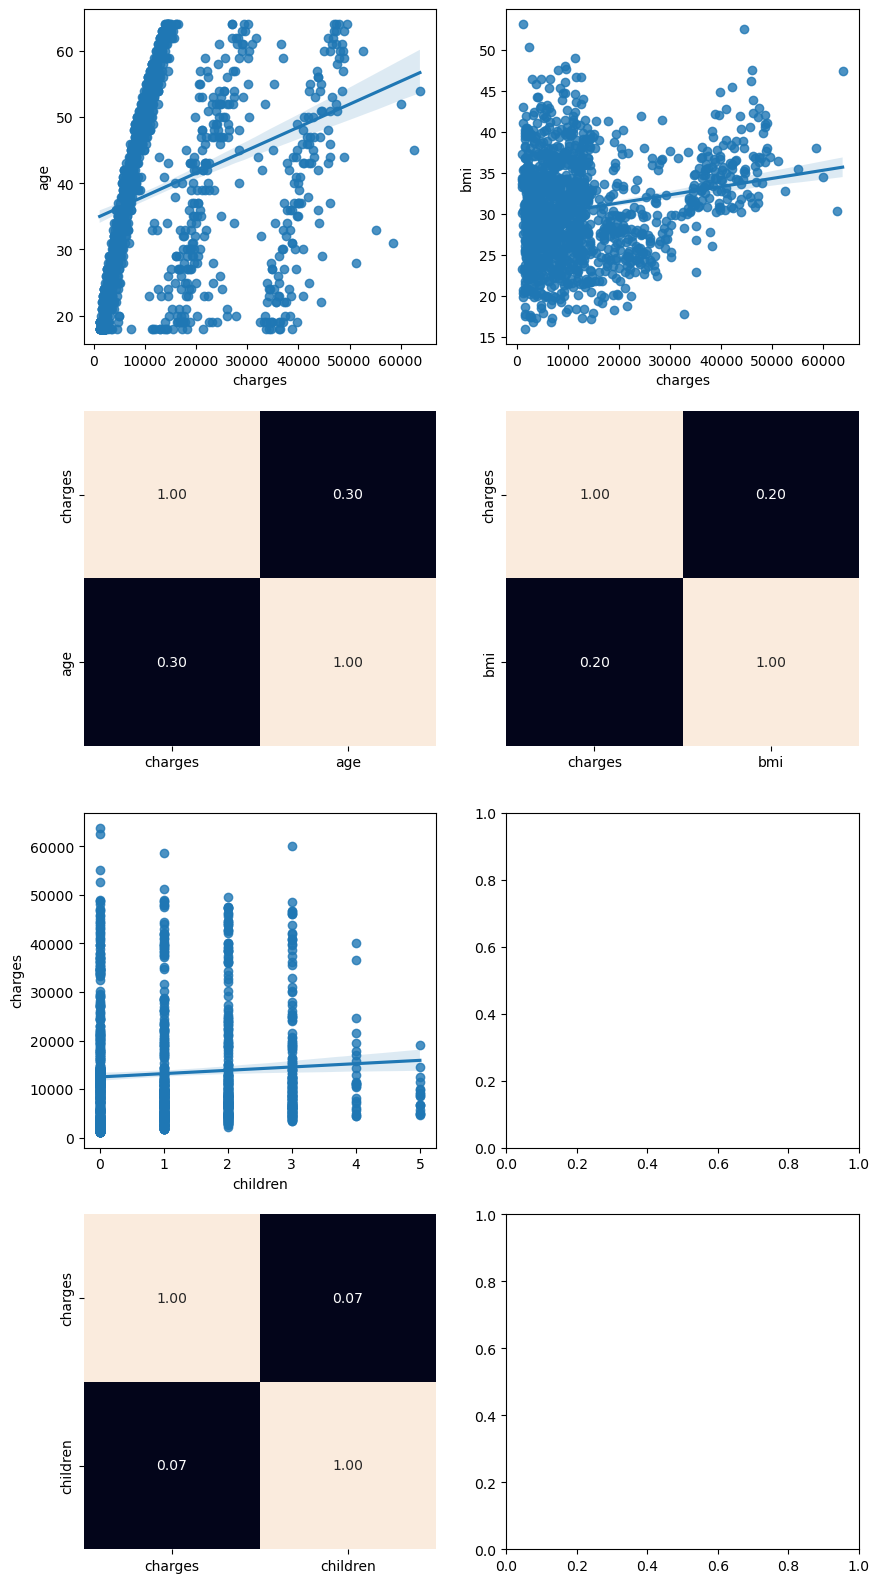

In [37]:
#analisis multivariante
#numerico-numerico

fig,axis= plt.subplots(4,2, figsize=(10,20))

sns.regplot(ax = axis[0, 0], data = df, x = "charges", y = "age")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax=axis[0,1],data=df,x="charges",y="bmi")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1 ], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

plt.show

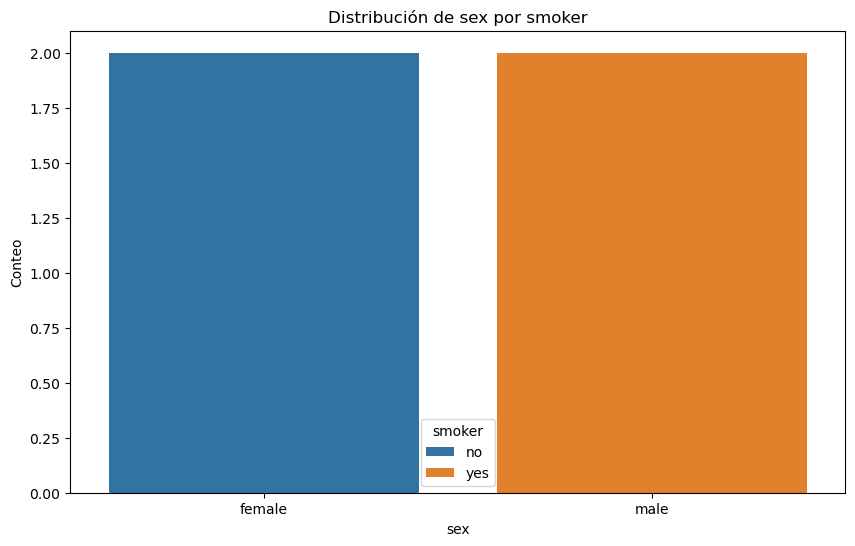

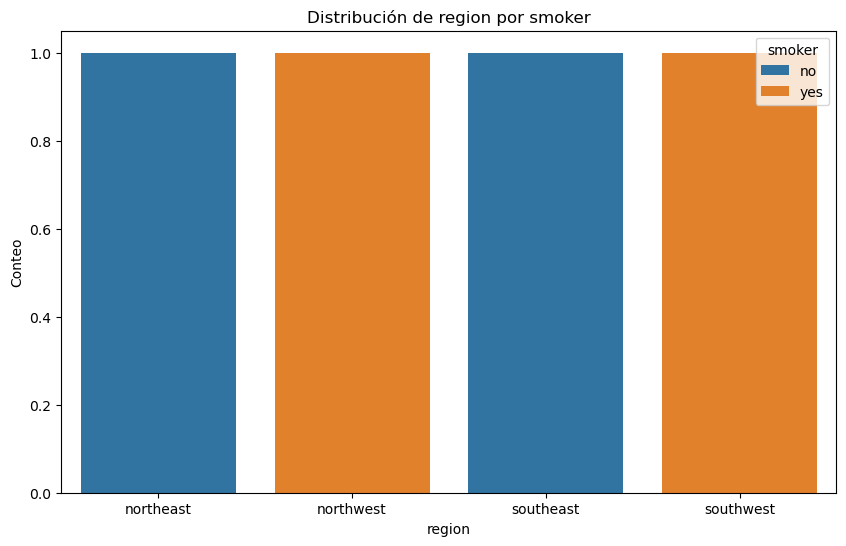

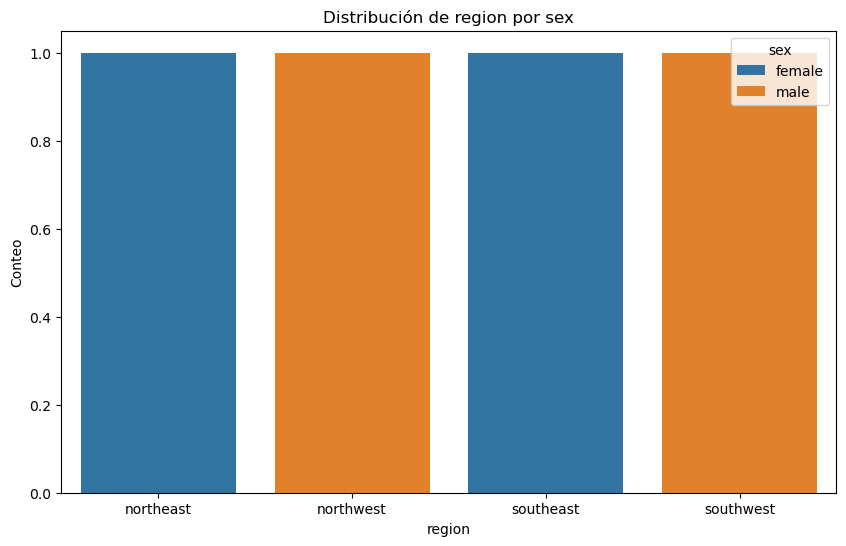

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def crear_graficos_categoricos(df2, variable_x, variable_hue):
    """
    Crea gráficos de barras agrupadas y apiladas para dos variables categóricas.

    Args:
        df2: DataFrame de Pandas.
        variable_x: Nombre de la variable en el eje x.
        variable_hue: Nombre de la variable para agrupar las barras.
    """
    # Gráfico de barras agrupadas
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable_x, hue=variable_hue, data=df2)
    plt.title(f'Distribución de {variable_x} por {variable_hue}')
    plt.xlabel(variable_x)
    plt.ylabel('Conteo')
    plt.legend(title=variable_hue)  # Añade una leyenda con título
    plt.show()

data = {
    'sex': ['female', 'male', 'female', 'male'],
    'smoker': ['no', 'yes', 'no', 'yes'],
    'region': ['northeast', 'northwest', 'southeast', 'southwest'],
}
df2 = pd.DataFrame(data)

crear_graficos_categoricos(df2, 'sex', 'smoker')
crear_graficos_categoricos(df2, 'region', 'smoker')
crear_graficos_categoricos(df2, 'region', 'sex')



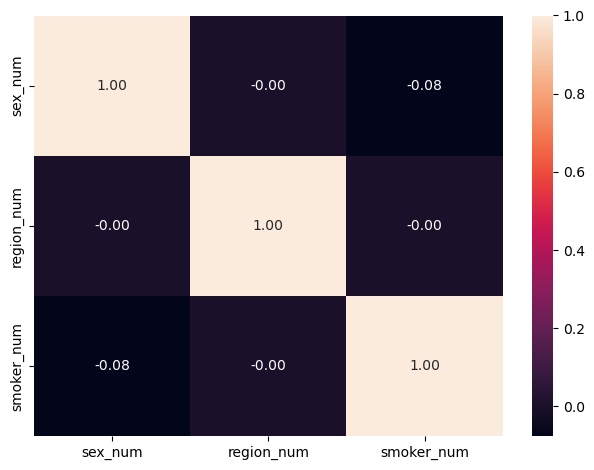

In [39]:

df['sex_num'] = pd.factorize(df['sex'])[0]
df['region_num'] = pd.factorize(df['region'])[0]
df['smoker_num'] = pd.factorize(df['smoker'])[0]

columnas_correlación = (['sex_num', 'region_num','smoker_num'])
sns.heatmap(df[columnas_correlación].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

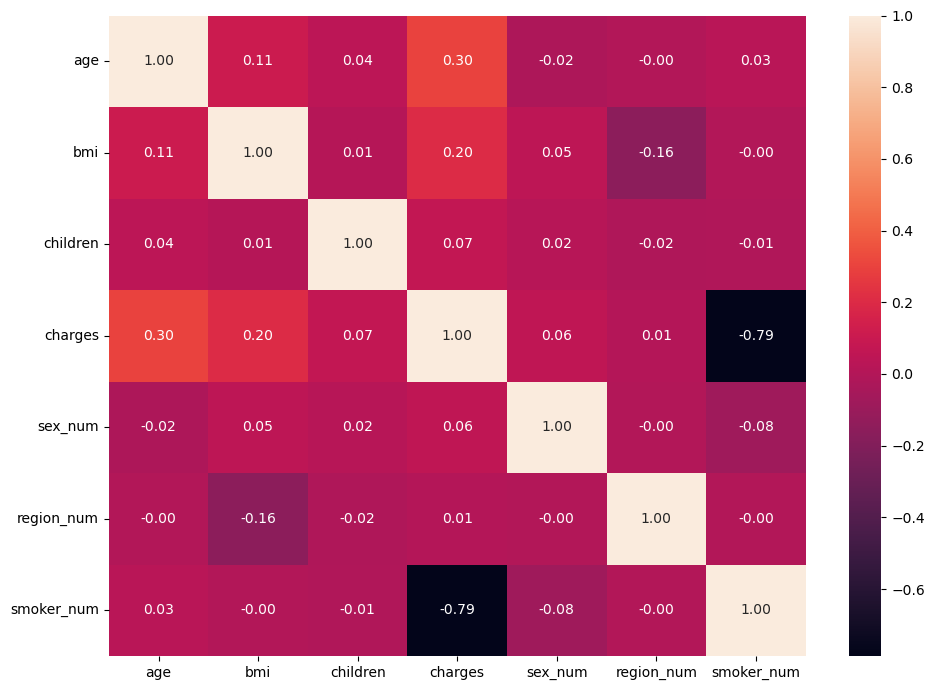

In [40]:
it, axis=plt.subplots(figsize=(10,7))

sns.heatmap(df._get_numeric_data().corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

In [41]:
df.groupby('charges')['smoker_num'].mean()

charges
1121.87390     1.0
1131.50660     1.0
1135.94070     1.0
1136.39940     1.0
1137.01100     1.0
              ... 
55135.40209    0.0
58571.07448    0.0
60021.39897    0.0
62592.87309    0.0
63770.42801    0.0
Name: smoker_num, Length: 1337, dtype: float64

In [42]:
df.charges.value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [43]:
#vamos a mejorar la precision del modelo. para eso buscaremos los outliers y ver su percentil

df.describe()

,age,bmi,children,charges,sex_num,region_num,smoker_num
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,1.484305,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,1.104885,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,2.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,3.000000,1.000000


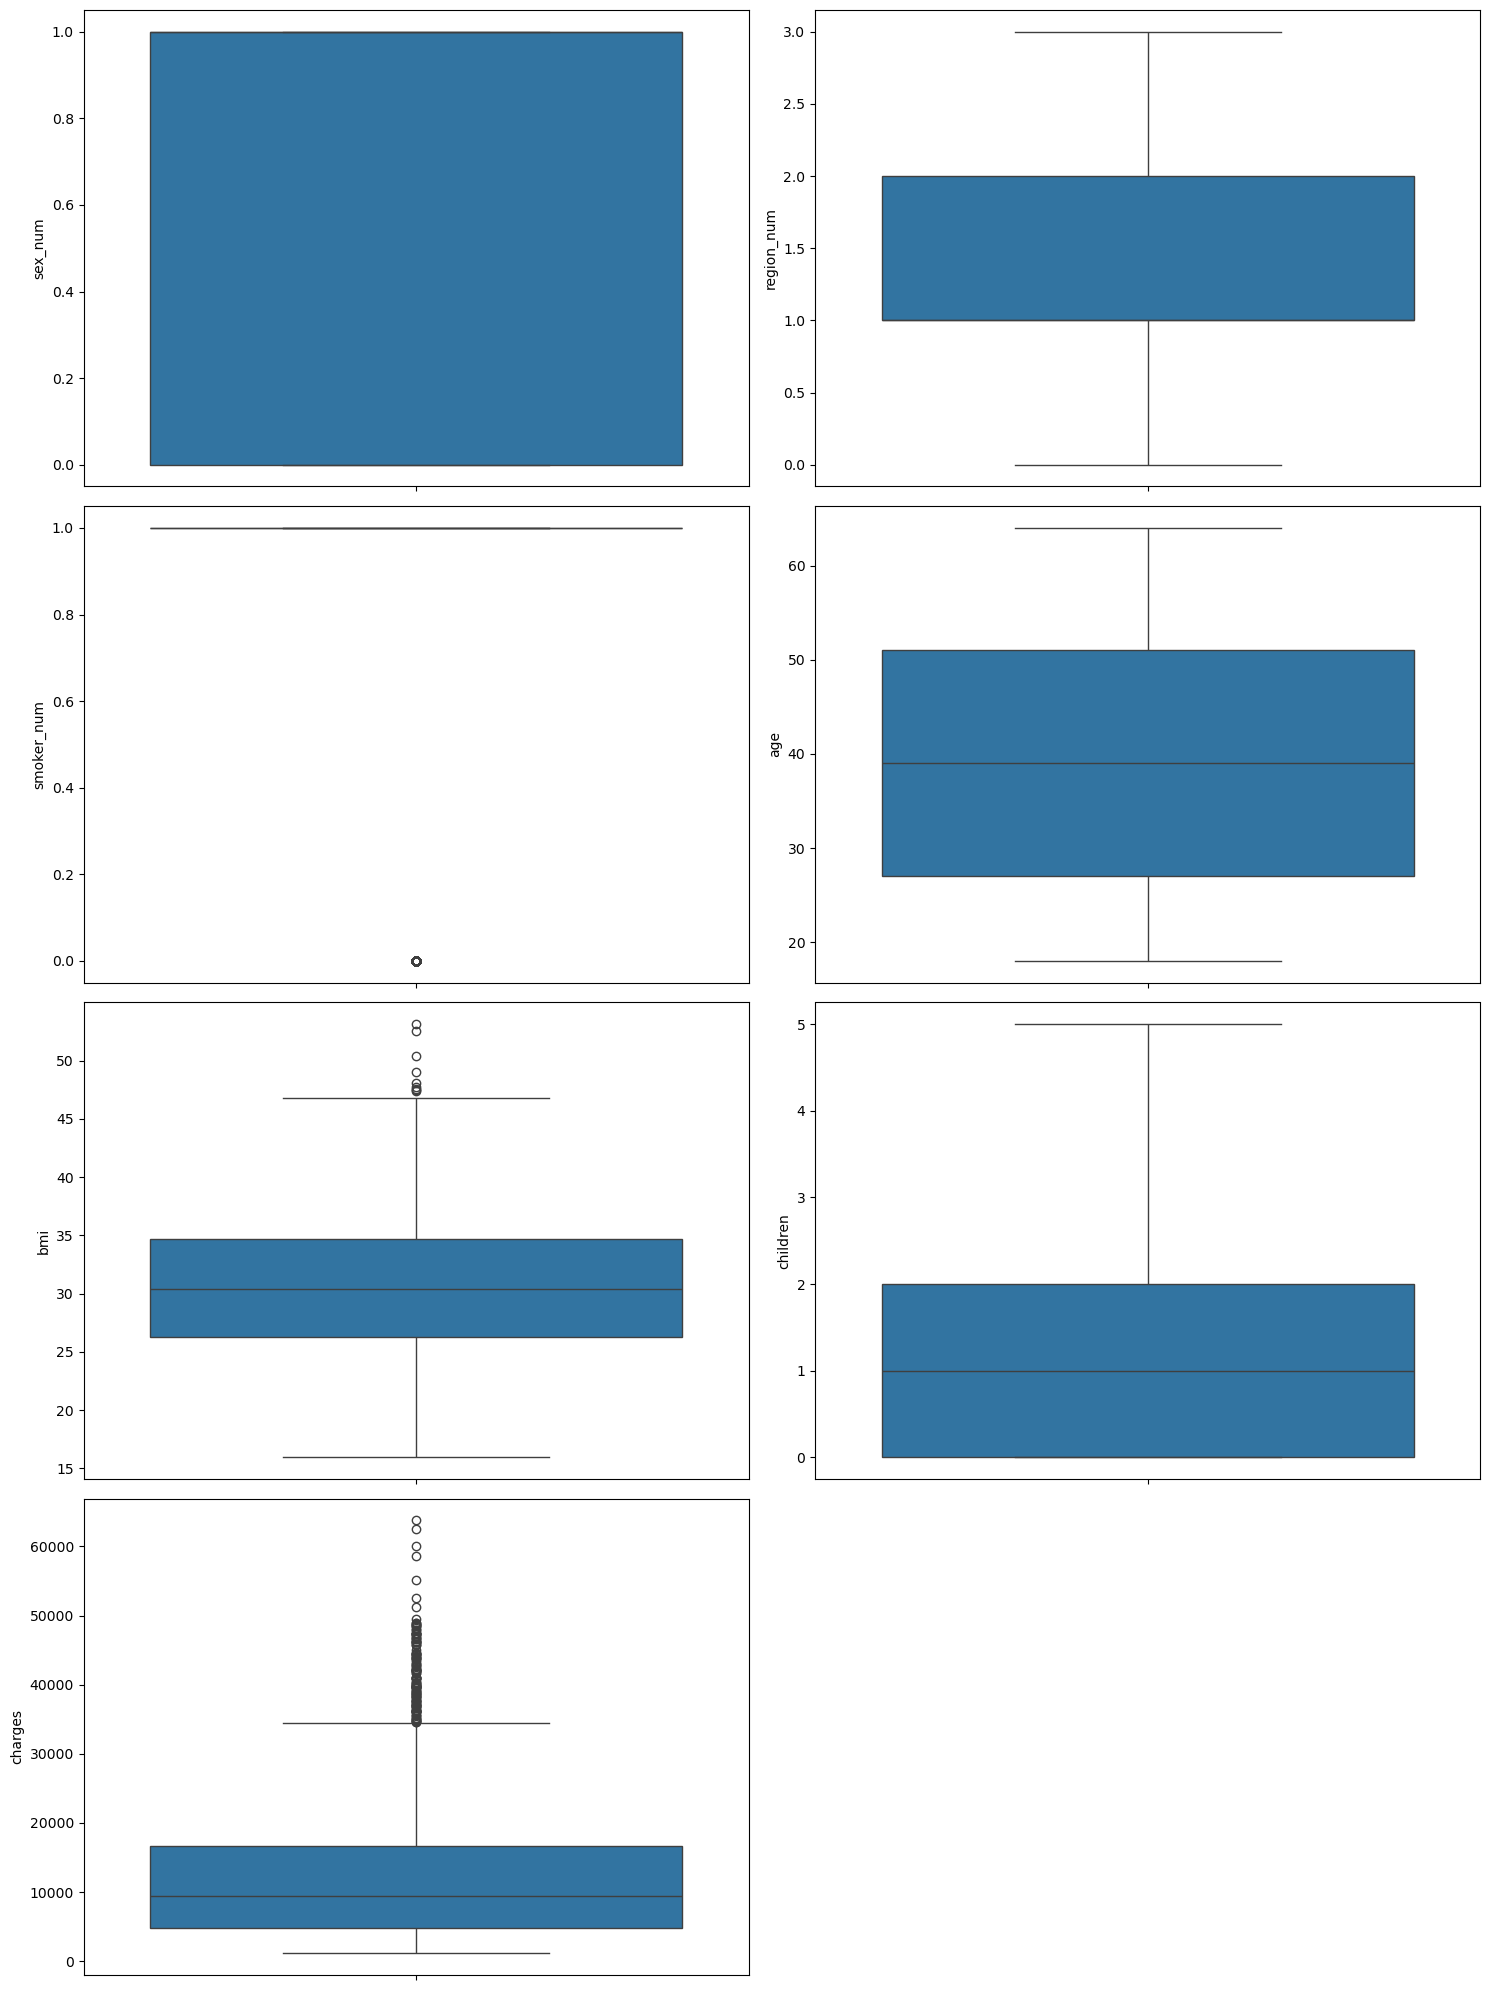

In [44]:
#Dibujar los diagramas de cajas de las variables también nos da una información muy poderosa sobre los valores atípicos
import numpy as np


nuevas_variables = ['sex_num', 'region_num','smoker_num','age', 'bmi', 'children', 'charges']
num_variables = len(nuevas_variables)
num_rows = (num_variables + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5)) 

for i, col in enumerate(nuevas_variables):
    row = i // 2  
    col_index = i % 2  
    sns.boxplot(ax=axes[row, col_index], data=df, y=col)

if num_variables % 2 != 0:
    axes[-1, 1].set_visible(False)

plt.tight_layout()
plt.show()


In [45]:
#basandome y analizando el boxplot de las variables numericas y el boxplot de las nuevas variables, eliminaremos edades mayores y excesos de bmi debido a que es un riesgo ecxcesivo, ademas que no se aceptn en los seguros

age_stats = df["age"].describe()
age_stats

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [46]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 87.0 y -9.0, con un rango intercuartílico de 24.0


In [47]:
bmi_stats = df["bmi"].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [48]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 47.29 y 13.7, con un rango intercuartílico de 24.0


In [49]:
df[(df["age"] > 64) | (df['bmi']>35)]
df

,age,sex,bmi,children,smoker,region,charges,sex_num,region_num,smoker_num
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,2,1
4,32,male,28.880,0,no,northwest,3866.85520,1,2,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,2,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,3,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1


In [50]:
#voy a eliminar los valores faltantes, ya que es un espacio que no tiene valor asignado, por lo tanto no me sirve
df.isnull().sum().sort_values(ascending=False)

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
sex_num       0
region_num    0
smoker_num    0
dtype: int64

In [51]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age           0.0
sex           0.0
bmi           0.0
children      0.0
smoker        0.0
region        0.0
charges       0.0
sex_num       0.0
region_num    0.0
smoker_num    0.0
dtype: float64

SIN VALORES FALTANTES

In [52]:
from sklearn.model_selection import train_test_split

num_variables = ['sex_num', 'region_num','smoker_num','age', 'bmi', 'children']

# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("charges", axis = 1)[num_variables]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

#separo el conjunto de datos para entrenar

,sex_num,region_num,smoker_num,age,bmi,children
560,0,2,1,46,19.95,2
1285,0,3,1,47,24.32,0
1142,0,1,1,52,24.86,0
969,0,1,1,39,34.32,5
486,0,2,1,54,21.47,3


In [53]:
#normalizacion

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()



,sex_num,region_num,smoker_num,age,bmi,children
560,-1.024602,0.456116,0.508747,0.472227,-1.756525,0.734336
1285,-1.024602,1.353256,0.508747,0.543313,-1.033082,-0.911192
1142,-1.024602,-0.441024,0.508747,0.898745,-0.943687,-0.911192
969,-1.024602,-0.441024,0.508747,-0.025379,0.622393,3.202629
486,-1.024602,0.456116,0.508747,1.040918,-1.504893,1.557100


In [54]:
X_train_norm["charges"] = list(y_train)
X_test_norm["charges"] = list(y_test)

In [55]:
X_train_norm.to_csv("../data/processed/train_limpio.csv", index=False)
X_test_norm.to_csv("../data/processed/test_limpio.csv", index=False)

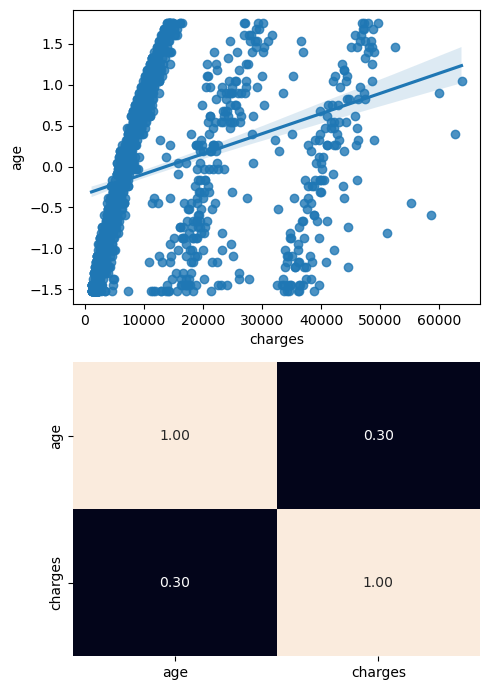

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))
total_data = pd.concat([X_train_norm, X_test_norm])

sns.regplot(ax = axis[0], data = total_data, x = "charges", y = "age")
sns.heatmap(total_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

Regresion Lineal Multiple

In [ ]:
#en este caso haremos  una regresion lineal multiple porque la Y, la vamos a comparar con mas de 2 variables, para sacar el  precio
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 10887.358730791097
Coeficientes (b): [-1.87914567e+01  2.71284266e+02 -2.36478181e+04  2.57056264e+02
  3.35781491e+02  4.25091456e+02]


In [ ]:
#intercepto es la linea recta corta un eje
#coeficiente, son las variables(sex, age, bmi, etc)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485916,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

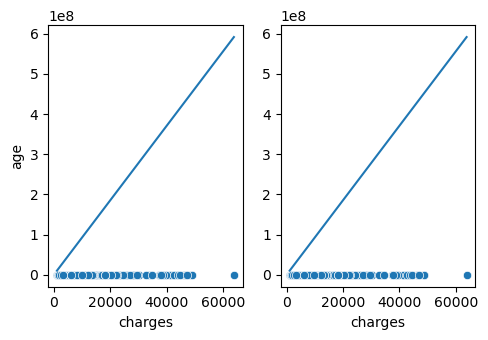

In [ ]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([X_train_norm, X_test_norm])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los gráficos
regression_equation = lambda x: 26354.43069701219 + 9277.78307971 * x

sns.scatterplot(ax = axis[0], data = X_test_norm, x = "charges", y = "age")
sns.lineplot(ax = axis[0], x = X_test_norm["charges"], y = regression_equation(X_test_norm["charges"]))
sns.scatterplot(ax = axis[1], x = X_test_norm["charges"], y = y_pred)
sns.lineplot(ax = axis[1], x = X_test_norm["charges"], y = regression_equation(X_test_norm["charges"])).set(ylabel = None)

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 33635210.431178406
Coeficiente de determinación: 0.7833463107364539


En conclusión: tengo una presision de 33635210, eso es un 78% de prediccion